# 從Open Images Dataset下載資料集

In [1]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git
!pip install -r /content/OIDv4_ToolKit/requirements.txt

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 23.94 MiB/s, done.
Resolving deltas: 100% (146/146), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 記得按'y'
!python /content/OIDv4_ToolKit/main.py downloader --classes Cat Dog --type_csv train  --multiclasses 1 --limit 10000


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Cat', 'Dog'] together.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 57602 KB/s, 0 seconds passed
[D

In [ ]:
# 記得按'y'
!python /content/OIDv4_ToolKit/main.py downloader --classes Cat Dog --type_csv validation --multiclasses 1 --limit 2000


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Cat', 'Dog'] together.
   [ERROR] | Missing the validation-annotations-bbox.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...100%, 16 MB, 48584 KB/s, 0 seconds passed


In [ ]:
# classes.txt 的內容為一行一個Class名稱(ex: Cat \n Dog)，檔名必須為classes.txt不能改(以供後續的convert_annotations.py讀取)
!cp "/content/drive/MyDrive/Colab Notebooks/yolo2/classes.txt"  /content/

In [ ]:
# 複製資料夾中的convert_annotations.py到colab磁碟中，並執行
!cp "/content/drive/MyDrive/Colab Notebooks/yolo2/convert_annotations.py"  /content/OIDv4_ToolKit/
!python /content/OIDv4_ToolKit/convert_annotations.py

Currently in subdirectory: validation
Converting annotations for class:  Cat_Dog
100% 400/400 [00:07<00:00, 50.58it/s]
Currently in subdirectory: train
Converting annotations for class:  Cat_Dog
100% 1996/1996 [00:33<00:00, 59.55it/s]


In [ ]:
# 移除
!rm -r /content/OID/Dataset/train/Cat_Dog/Label/
!rm -r /content/OID/Dataset/validation/Cat_Dog/Label/

In [ ]:
# 建立yolo之後要用的images/train/和images/valid/資料夾，並將下載下來的圖片和label.txt移至資料夾內
!mkdir -p images/train
!mv /content/OID/Dataset/train/Cat_Dog/*.jpg images/train
!mkdir -p labels/train
!mv /content/OID/Dataset/train/Cat_Dog/*.txt labels/train
!mkdir -p images/valid
!mv /content/OID/Dataset/validation/Cat_Dog/*.jpg images/valid
!mkdir -p labels/valid
!mv /content/OID/Dataset/validation/Cat_Dog/*.txt labels/valid

In [ ]:
# 建立一個catordog資料夾，並將剛才的images和labels資料夾移入
!mkdir catordog
!mv images catordog
!mv labels catordog

In [ ]:
# 將整個catordog資料夾壓縮成一縮檔，並匯回原端硬碟內(以供下次執行)
!zip -r catordog.zip catordog
!cp /content/catordog.zip "/content/drive/MyDrive/Colab Notebooks/yolo2/"

  adding: catordog/ (stored 0%)
  adding: catordog/images/ (stored 0%)
  adding: catordog/images/train/ (stored 0%)
  adding: catordog/images/train/01a4d117dfbb9953.jpg (deflated 0%)
  adding: catordog/images/train/0a826893e7b83175.jpg (deflated 0%)
  adding: catordog/images/train/0b2125e3c6660b85.jpg (deflated 0%)
  adding: catordog/images/train/948d34a75bfb5621.jpg (deflated 0%)
  adding: catordog/images/train/e0ea704353381e50.jpg (deflated 0%)
  adding: catordog/images/train/1de21baa6fd6a5f3.jpg (deflated 0%)
  adding: catordog/images/train/763eb659f24f23cb.jpg (deflated 0%)
  adding: catordog/images/train/62ef6975acd031d7.jpg (deflated 0%)
  adding: catordog/images/train/d288d46588670cd4.jpg (deflated 0%)
  adding: catordog/images/train/e7525ca3f398bac8.jpg (deflated 1%)
  adding: catordog/images/train/2737b45d248d85fd.jpg (deflated 0%)
  adding: catordog/images/train/5b936da8e291a7de.jpg (deflated 0%)
  adding: catordog/images/train/37d1dffd4ee1ad60.jpg (deflated 0%)
  adding: cat

# Yolo訓練









In [ ]:
# 確認GPU
!nvidia-smi

Thu Sep 21 13:47:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# 安裝
!pip install ultralytics==8.0.150

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.9/614.9 kB 9.9 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.150 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 從雲端硬碟中，把之前下載好的壓縮檔載回來
!ls "/content/drive/MyDrive/Colab Notebooks/yolo2"
!cp "/content/drive/MyDrive/Colab Notebooks/yolo2/catordog.zip" /content

In [ ]:
# 將載回來的壓縮檔解壓縮
!unzip /content/catordog.zip -d /content/

Archive:  /content/catordog.zip
replace /content/catordog/images/train/01a4d117dfbb9953.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/catordog/images/train/0a826893e7b83175.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# 訓練model
!yolo task=detect mode=train model=yolov8s.pt data="/content/drive/MyDrive/Colab Notebooks/yolo2/catordog.yaml" epochs=20 imgsz=256 plots=True

100% 21.5M/21.5M [00:00<00:00, 171MB/s]
New https://pypi.org/project/ultralytics/8.0.183 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.150 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Colab Notebooks/yolo2/catordog.yaml, epochs=20, patience=50, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=No

In [ ]:
# 儲存model
!cp '/content/runs/detect/train/weights/best.pt' "/content/drive/MyDrive/Colab Notebooks/yolo2/"

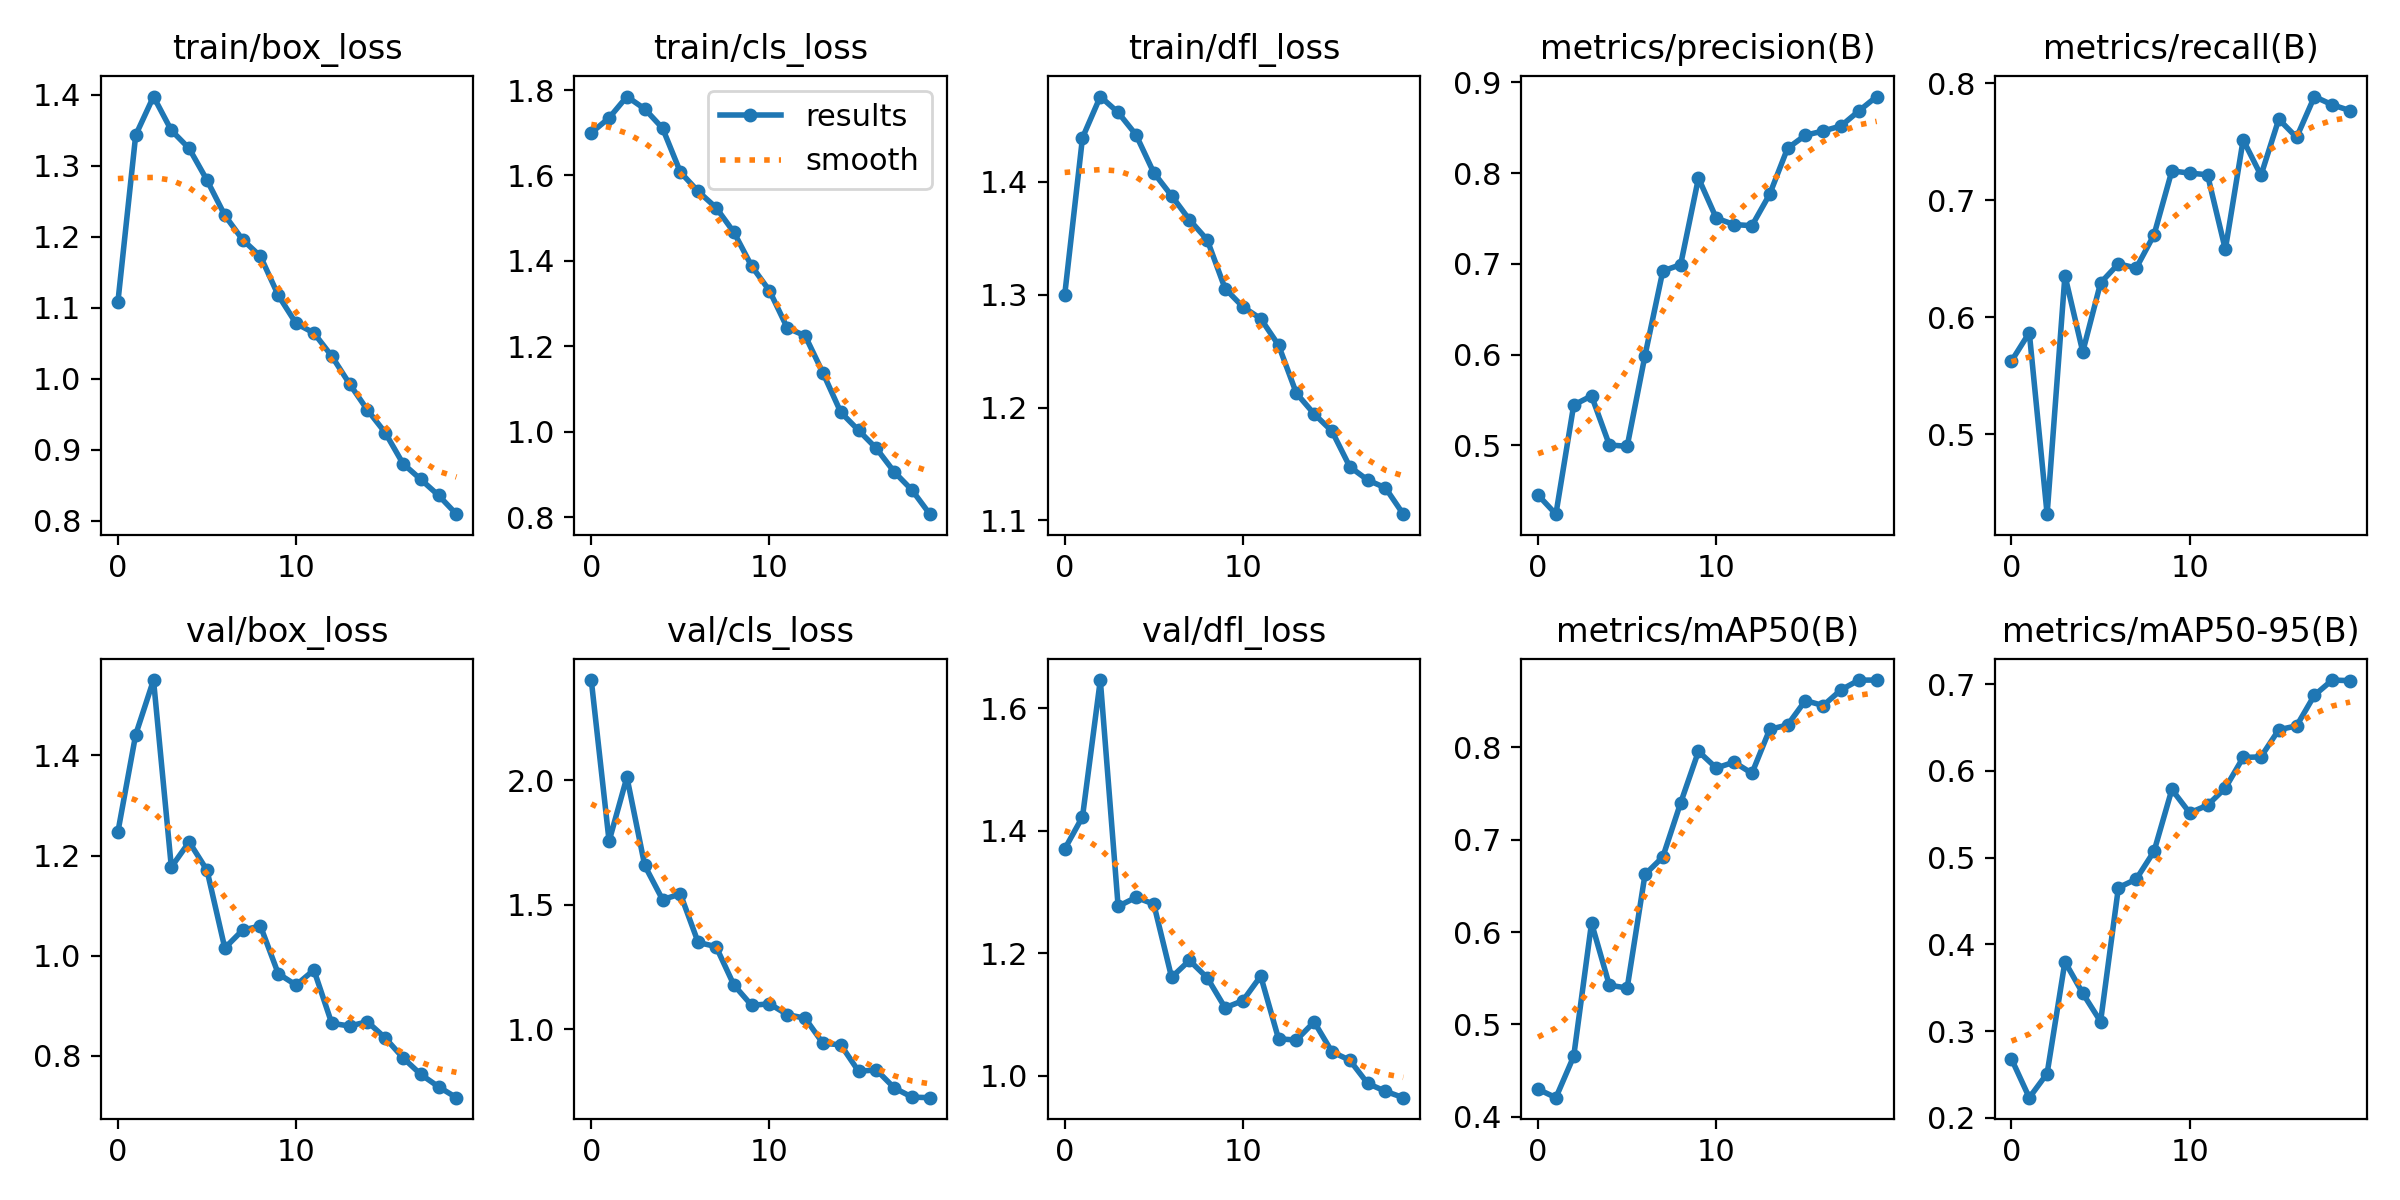

In [ ]:
# 訓練歷程記錄圖
Image(filename='/content/runs/detect/train/results.png', width=600)

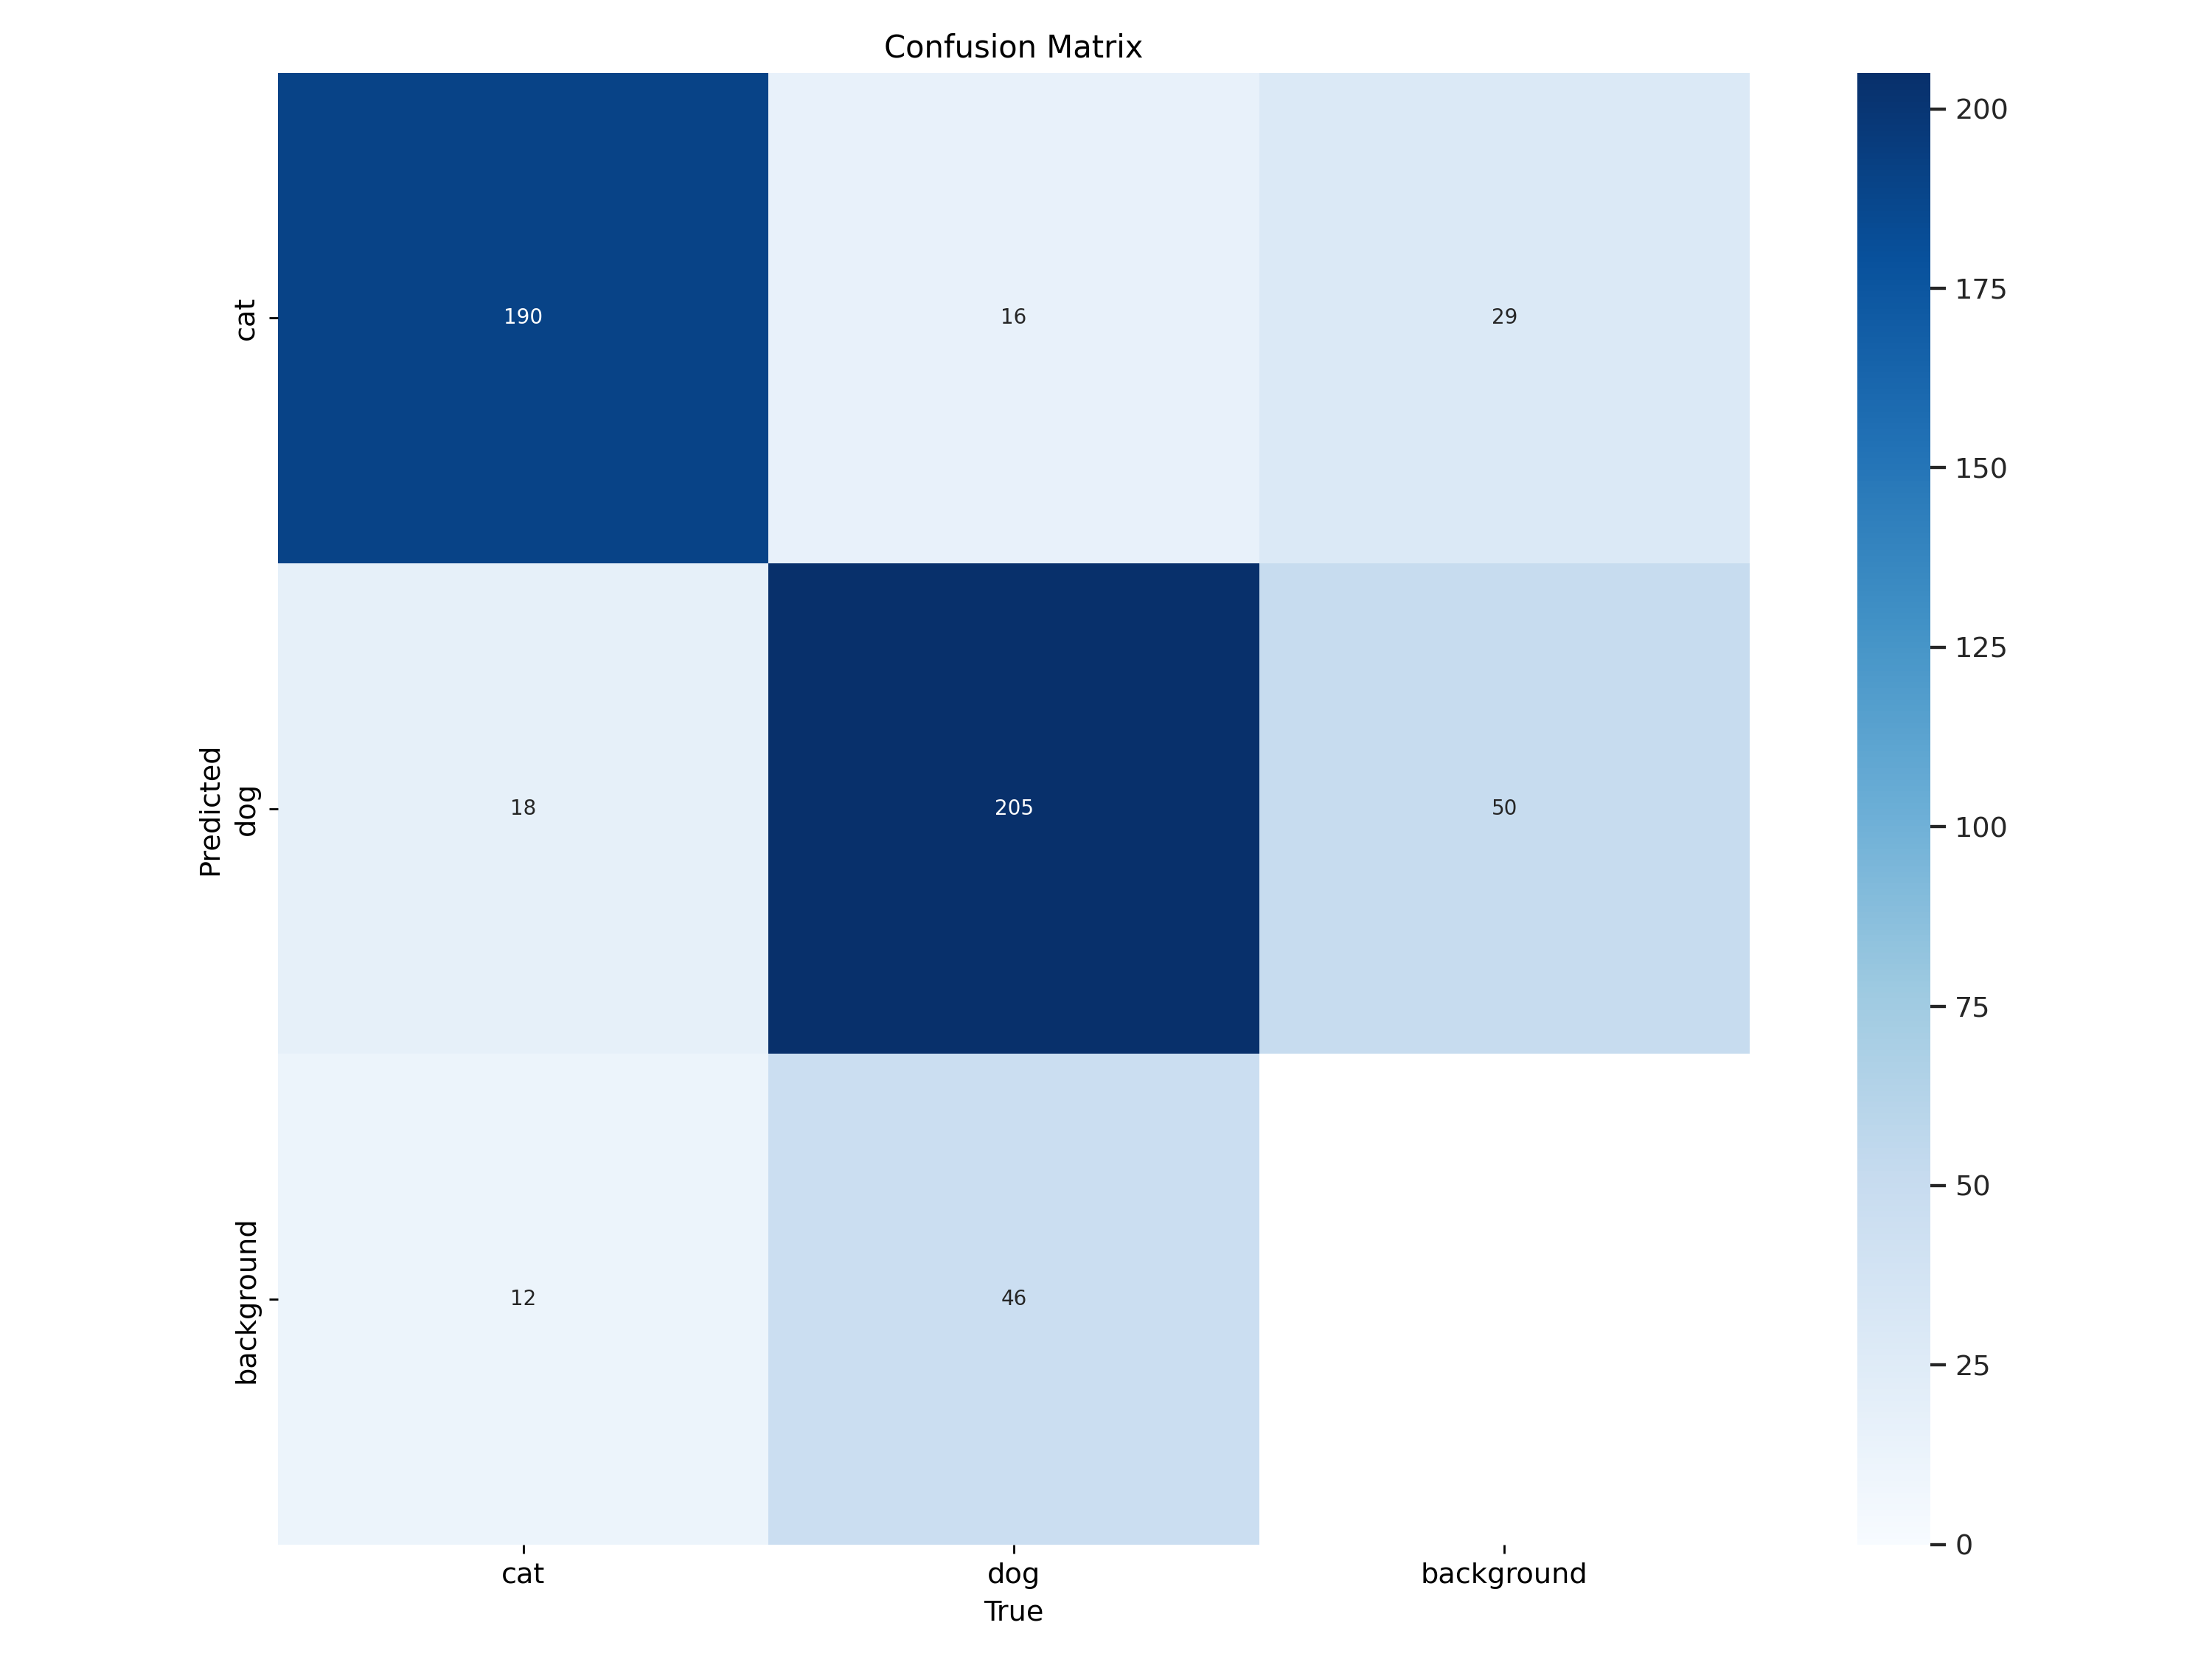

In [ ]:
# 訓練結果matrix圖
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

# 測試

In [ ]:
# 使用command測試位於雲端硬碟內的圖片
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source="/content/drive/MyDrive/Colab Notebooks/yolo2/xxx.jpg" save=True

In [ ]:
# 顯示測試圖片結果
display(Image(filename='/content/runs/detect/predict/xxx.jpg', width=600))

In [ ]:
# 使用python測試位於雲端硬碟內的圖片
model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model.predict(source='/content/drive/MyDrive/Colab Notebooks/yolo2/xxx.jpg', conf=0.25)

In [ ]:
# detected boxes' coordinates tensors
results[0].boxes.xyxy

In [ ]:
# detected boxes' coordinates arrays
results[0].boxes.xyxy.detach().cpu().numpy()

In [ ]:
# confidence values
results[0].boxes.conf.detach().cpu().numpy()

In [ ]:
# classes
results[0].boxes.cls.detach().cpu().numpy()

In [ ]:
# 測試雲端硬碟內的影片
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source="/content/drive/MyDrive/Colab Notebooks/yolo/data/test.mp4" save=True

In [ ]:
# 將結果影片傳回雲端硬碟
!cp /content/runs/detect/predict2/test.avi "/content/drive/MyDrive/Colab Notebooks/yolo/yolo_v8/"